In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data=sns.load_dataset(name='iris')

In [ ]:
def mean(arr):
  sum=0
  mean=0
  for i in arr:
    sum+=i
  mean=sum/len(arr)
  return mean

def variance(arr):
  s=0
  var=0
  for i in arr:
    s+=(i-mean(arr))**2
    var=s/len(arr)
  return var

def covariance(x,y):
  ex=mean(x)
  ey=mean(y)

  num=sum((x[i]-ex)*(y[i]-ey) for i in range(len(x)))
  cov=num/len(x)
  return cov


def standard(df,n,m):
  for i in range (n):
    ex=mean(df[:,i])
    var=variance(df[:,i])

    for j in range (m):
      df[j, i]=(df[j, i]-ex)/var**0.5

  return(df)

Q1: Estimate the covariance matrix of the 4 attributes.

In [ ]:
x=df.shape[0]
y=df.shape[1]
c_matrix=np.zeros((y,y)) ### defining the covariance matrix

df=data.iloc[:, :4].to_numpy()
df=standard(df,y,x)

for i in range (y):
  for j in range (y):
    c_matrix[i][j]=covariance(df[:, i], df[:, j])

print('Covariance Matrix:')
print('\t\t', 'sepal_length \t\t', 'sepal_width \t\t', 'petal_length \t\t', 'petal_width \t\t', end='\n\n')
for i in range(y):
    attr= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
    print(attr[i], end='\t')
    for j in range(y):
        print(c_matrix[i][j], end='\t')
    print(end='\n\n')

Covariance Matrix:
		 sepal_length 		 sepal_width 		 petal_length 		 petal_width 		

sepal_length	0.9999999999999997	-0.11756978413300201	0.8717537758865834	0.817941126271576	

sepal_width	-0.11756978413300201	0.9999999999999987	-0.42844010433054	-0.3661259325364394	

petal_length	0.8717537758865834	-0.42844010433054	1.0000000000000004	0.9628654314027959	

petal_width	0.817941126271576	-0.3661259325364394	0.9628654314027959	1.0	



Q2: Estimate the four principal components of the data.

In [ ]:
eig_val, eig_vec=np.linalg.eig(covmatrix)

eig_val=[(eig_val[i], i) for i in range(eig_val.size)]
eig_val.sort(reverse=True)

eig_vec=np.array([eig_vec[:, i] for _, i in eig_val]).T

for i in range(eig_vec.shape[1]):
    print(f"Principal Component {i+1}:",eig_vec[:, i])

Principal Component 1: [ 0.52106591 -0.26934744  0.5804131   0.56485654]
Principal Component 2: [-0.37741762 -0.92329566 -0.02449161 -0.06694199]
Principal Component 3: [-0.71956635  0.24438178  0.14212637  0.63427274]
Principal Component 4: [ 0.26128628 -0.12350962 -0.80144925  0.52359713]


Q3. Perform dimensionality reduction using PCA to reduce 150 data points into two dimensions and three dimensions.

In [ ]:
df_red=np.dot(df, eig_vec)

print('Reduced 2D Data:',end="\n\n")
print('\tPC1\t\t\tPC2')
for i in range(15):  #### The no. of rows to be printed can be changed in this line
    print('\t'.join(map(str, df_red[i][:2])))

print()

print('Reduced 3D Data:',end="\n\n")
print('\tPC1\t\t\tPC2\t\t\tPC3')
for i in range(15):
    print('\t'.join(map(str, df_red[i][:3])))

Reduced 2D Data:

	PC1			PC2
-2.2647028088075896	-0.4800265965209877
-2.0809611519657683	0.6741335566053541
-2.364229053890302	0.34190802388467767
-2.2993842170427086	0.5973945076746772
-2.3898421663138456	-0.6468353829020256
-2.0756309481765136	-1.4891775233211648
-2.4440288351341533	-0.04764419763001248
-2.232847158872016	-0.22314807268959022
-2.3346404779076217	1.1153276754616677
-2.184328174933943	0.46901356140237715
-2.166310100701324	-1.0436906530538583
-2.3261308664426994	-0.13307833523922996
-2.21845089882241	0.7286761653165721
-2.6331006957652288	0.9615067291701643
-2.198740603266692	-1.8600571132939299

Reduced 3D Data:

	PC1			PC2			PC3
-2.2647028088075896	-0.4800265965209877	-0.12770602230015185
-2.0809611519657683	0.6741335566053541	-0.23460885398456835
-2.364229053890302	0.34190802388467767	0.04420148483874371
-2.2993842170427086	0.5973945076746772	0.09129010632068175
-2.3898421663138456	-0.6468353829020256	0.015738195676259406
-2.0756309481765136	-1.4891775233211648	0.02

Q4. Visualize the reduced dimension 150 data points in 2D and 3D while giving different colors to reduced data points of diff different species.

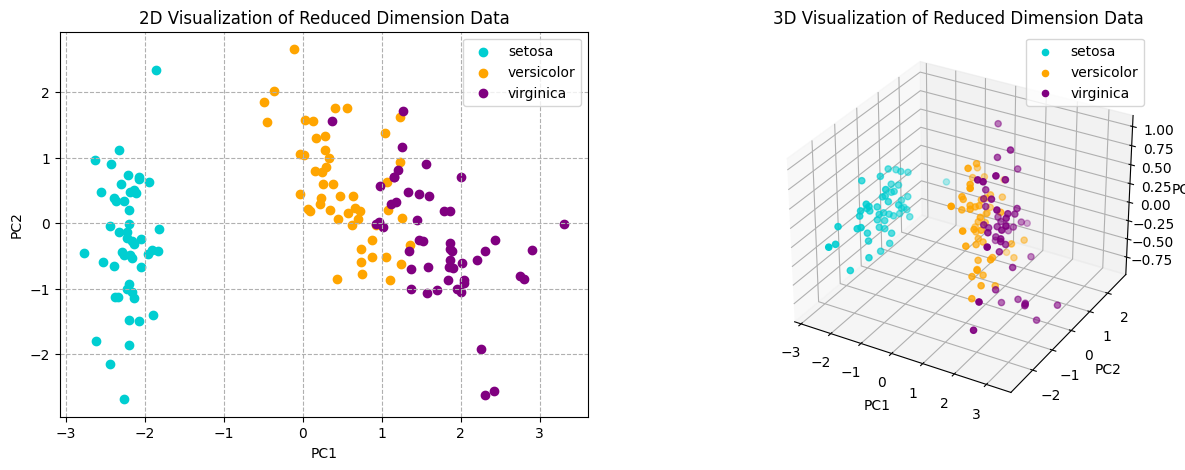

In [ ]:
fig = plt.figure(figsize=(15,5))
palette={'setosa':'darkturquoise','versicolor':'orange','virginica':'purple'}

## 2D plot
ax1 = fig.add_subplot(121)
for species in data['species'].unique():
    ax1.scatter(df_red[data['species']==species, 0],df_red[data['species']==species,1],label=species,color=palette[species])

ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_title('2D Visualization of Reduced Dimension Data')
ax1.legend()
ax1.grid(linestyle='--')

## 3D plot
ax2 = fig.add_subplot(122, projection='3d')
for species in data['species'].unique():
    ax2.scatter(df_red[data['species']==species,0],df_red[iris['species']==species,1],df_red[iris['species']==species,2],label=species,color=palette[species])

ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel('PC3')
ax2.set_title('3D Visualization of Reduced Dimension Data')
ax2.legend()
plt.show()